<a href="https://colab.research.google.com/github/DarkSchneider/Exercises/blob/main/lab3_Interpolazione_Approssimazione_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 : Interpolazione, approssimazione e SVD  

## 1) Approssimazione di un set di dati tramite Minimi Quadrati


---

Sia $\{(x_i, y_i)\}_{i=1}^N$ un set di dati, che devono essere approssimati da un polinomio
\begin{align*}
  p(x) = \alpha_0 + \alpha_1 x + \dots + \alpha_n x^n 
\end{align*}
di grado $n \in \mathbb{N}$ fissato. \\

Si definisce una matrice

\begin{align*}
  A = 
  \begin{bmatrix}
    1 & x_1 & x_1^2 & \dots & x_1^n \\
    1 & x_2 & x_2^2 & \dots & x_2^n \\
    \vdots & \vdots & \vdots & \vdots & \vdots \\
    1 & x_N & x_N^2 & \dots & x_N^n
  \end{bmatrix}
\end{align*}

E i vettori

\begin{align*}
  \alpha = 
  \begin{bmatrix}
    \alpha_0 \\ \vdots \\ \alpha_n
  \end{bmatrix} \qquad
  y = 
  \begin{bmatrix} 
    y_0 \\ \vdots \\ y_N
  \end{bmatrix}
\end{align*} \\

Reimpostando il problema con la formulazione ai minimi quadrati e risolvendo quindi il problema

\begin{align*}
  \min_\alpha ||A \alpha - y||_2^2
\end{align*}

si ottengono i coefficenti $\alpha$ che definiscono in modo univoco il polinomio interpolante $p(x)$. \\


* Calcolare il polinomio di grado $n = 5$ che approssimi i seguenti dati:$\{ (1.0, 1.18), (1.2, 1.26), (1.4, 1.23), (1.6, 1.37), (1.8, 1.37), (2.0, 1.45), (2.2, 1.42), (2.4, 1.46), (2.6, 1.53), (2.8, 1.59), (3.0, 1.50) \}$ 
* Risolvere il problema ai minimi quadrati sia con le equazioni normali che con la SVD.
* Valutare graficamente i polinomi di approssimazione e confrontare gli errori commessi dai due metodi sul set di punti.

# Nuova sezione

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 5 # Grado del polinomio approssimante

x = np.array([1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3])
y = np.array([1.18, 1.26, 1.23, 1.37, 1.37, 1.45, 1.42, 1.46, 1.53, 1.59, 1.5])

print('Shape of x:', x.shape)
print('Shape of y:', y.shape, "\n")

N = x.size # Numero dei dati

A = np.zeros((N, n+1))

for i in range(n+1): #n+1 colonne poichè si parte da 0, c'è il termine noto
  A[0:N, i] = np.power(x[0:N],i)

print("A = \n", A)

Shape of x: (11,)
Shape of y: (11,) 

A = 
 [[  1.        1.        1.        1.        1.        1.     ]
 [  1.        1.2       1.44      1.728     2.0736    2.48832]
 [  1.        1.4       1.96      2.744     3.8416    5.37824]
 [  1.        1.6       2.56      4.096     6.5536   10.48576]
 [  1.        1.8       3.24      5.832    10.4976   18.89568]
 [  1.        2.        4.        8.       16.       32.     ]
 [  1.        2.2       4.84     10.648    23.4256   51.53632]
 [  1.        2.4       5.76     13.824    33.1776   79.62624]
 [  1.        2.6       6.76     17.576    45.6976  118.81376]
 [  1.        2.8       7.84     21.952    61.4656  172.10368]
 [  1.        3.        9.       27.       81.      243.     ]]


# Risoluzione tramite equazioni normali

---

Il problema ai minimi quadrati

\begin{align*}
  \min_\alpha ||A\alpha - y||_2^2
\end{align*}

può essere risolto col metodo delle equazioni normali, ossia osservando che il problema di minimo può essere riscritto come:

\begin{align*}
  A^T A \alpha = A^T y
\end{align*}

Risolvendo questo sistema lineare (ad esempio con fattorizzazione di Cholesky o con metodi iterativi) si ottiene il vettore degli $\alpha$ che corrisponde ai coefficenti del polinomio approssimante.

In [ ]:
import scipy.linalg
import scipy.linalg.decomp_lu as LUdec

# Per chiarezza, calcoliamo la matrice del sistema e il termine noto a parte
ATA = np.matmul(A.T,A)
ATy = np.matmul(A.T,y)

lu, piv = LUdec.lu_factor(ATA)

print('LU = \n', lu)
print('piv = ', piv)

alpha_normali = LUdec.lu_solve((lu, piv), ATy)
print('Soluzione equazioni normali: ', alpha_normali)

LU = 
 [[ 7.35328000e+02  1.95059392e+03  5.27874688e+03  1.45060095e+04
   4.03459360e+04  1.13308832e+05]
 [ 3.87218765e-01 -1.99785686e+01 -9.34359274e+01 -3.38252200e+02
  -1.11669401e+03 -3.52936988e+03]
 [ 2.99186213e-02  4.98488209e-01  3.04387901e+00  1.93477282e+01
   8.48920156e+01  3.19899161e+02]
 [ 1.55576831e-01  9.37725871e-01  5.56715647e-01  2.11588465e-01
   1.74616541e+00  9.26911097e+00]
 [ 1.49593107e-02  3.59362103e-01  9.89171005e-01 -8.65322309e-01
   2.11931056e-02  2.13563205e-01]
 [ 6.58209670e-02  7.00249264e-01  8.89987853e-01  8.03632732e-01
  -3.10453039e-01 -3.53025415e-04]]
piv =  [5 4 4 3 5 5]
Soluzione equazioni normali:  [  8.43398599 -22.03171904  25.44762521 -13.98346441   3.70592948
  -0.38060897]


# Risoluzione tramite SVD

---

Consideriamo la decomposizione SVD della matrice $A$

\begin{align*}
  A = U S V^T
\end{align*}

Con $U \in \mathbb{R}^{N \times N}$ e $V^T \in \mathbb{R}^{n \times n}$ matrici unitarie e $S \in \mathbb{R}^{N \times n}$ diagonale. \\

Le equazioni normali diventano:

\begin{align*}
  &A^T A \alpha = A^T y \iff V S U^T U S V^T \alpha = V S U^T y \iff \\
  & V S^2 V^T \alpha = V S U^T y \iff S V^T \alpha = U^T y \iff \\
  & \alpha = S^{-1} V U^T y
\end{align*}

E quindi

\begin{align*}
  \alpha_i = \sum_{j=1}^N \frac{(u_i^T y)v_i}{s_i}
\end{align*}

In [ ]:
help(scipy.linalg.svd)

Help on function svd in module scipy.linalg.decomp_svd:

svd(a, full_matrices=True, compute_uv=True, overwrite_a=False, check_finite=True, lapack_driver='gesdd')
    Singular Value Decomposition.
    
    Factorizes the matrix `a` into two unitary matrices ``U`` and ``Vh``, and
    a 1-D array ``s`` of singular values (real, non-negative) such that
    ``a == U @ S @ Vh``, where ``S`` is a suitably shaped matrix of zeros with
    main diagonal ``s``.
    
    Parameters
    ----------
    a : (M, N) array_like
        Matrix to decompose.
    full_matrices : bool, optional
        If True (default), `U` and `Vh` are of shape ``(M, M)``, ``(N, N)``.
        If False, the shapes are ``(M, K)`` and ``(K, N)``, where
        ``K = min(M, N)``.
    compute_uv : bool, optional
        Whether to compute also ``U`` and ``Vh`` in addition to ``s``.
        Default is True.
    overwrite_a : bool, optional
        Whether to overwrite `a`; may improve performance.
        Default is False.
    

In [ ]:
U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(s.shape)
ui = np.zeros(U.shape)

for i in range(n+1):
  ui = U[:,i]
  vi = Vh[i,:]
  uiy = np.matmul(ui.T, y[0:Vh.size])
  print(uiy)
  alpha_svd = alpha_svd + (ui @ y) * vi / s[i]
print('La soluzione in SVD: ',alpha_svd)

Shape of U: (11, 11)
Shape of s: (6,)
Shape of V: (6, 6)
-3.3297763102873454
2.8277547294041754
-1.565124796625775
-0.2660055872324044
-0.02507081903228775
0.054963640655087895
La soluzione in SVD:  [  8.43398601 -22.03171911  25.44762529 -13.98346445   3.70592949
  -0.38060897]


# Verifica e confronto delle soluzioni

In [ ]:
def p(alpha, x):
  N = len(x)
  n = len(alpha)

  A = np.zeros((N,n))

  for i in range(n):
    A[:,i] = np.power(x, i)
  
  return A @ alpha

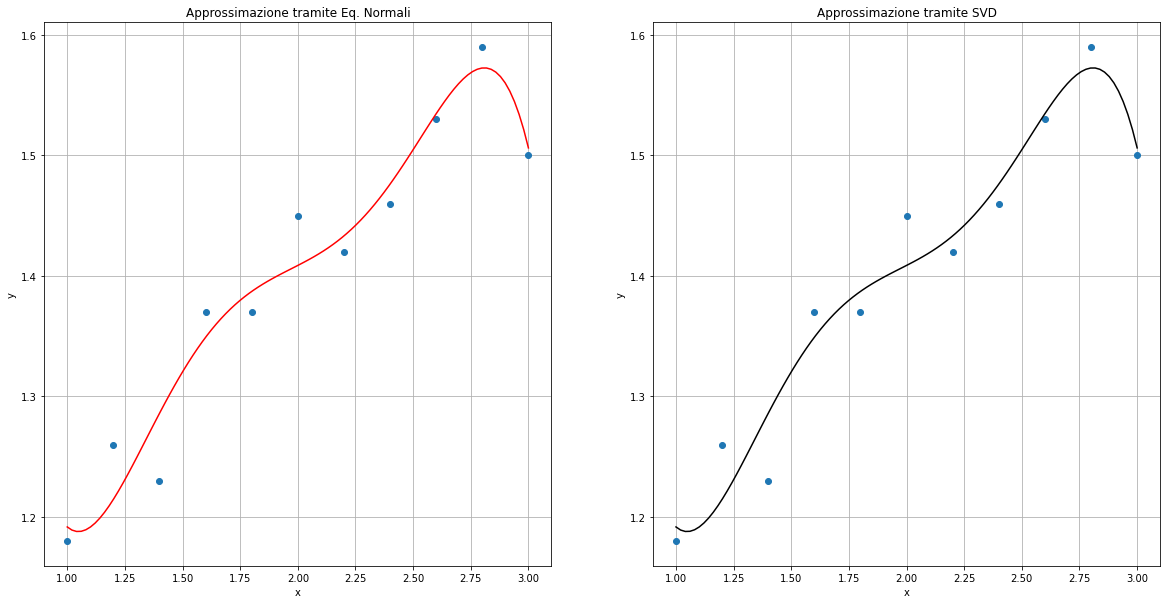

In [ ]:
# VETTORE PUNTI PER IL GRAFICO
x_plot = np.linspace(1, 3, 100)

#VALUTAZIONE POLINOMIO NEI PUNTI X_PLOT
y_normali = p(alpha_normali, x_plot)
y_svd = p(alpha_svd, x_plot)

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_normali, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite Eq. Normali')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'o')
plt.plot(x_plot, y_svd, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite SVD')
plt.grid()

plt.show()

# 2) Import dataset da Kaggle

---

Come secondo esercizio andremo ad eseguire approssimazione polinomiale su un dataset caricato dall'esterno. Nello specifico, utilizzeremo un data set di Kaggle (www.kaggle.com) contenente dati riguardanti gli anni di esperienza e lo stipendio di alcuni individui (nello specifico 30).
Il data set è scaricabile al seguente indirizzo: https://www.kaggle.com/karthickveerakumar/salary-data-simple-linear-regression/ . \\

Una volta scaricato, è necessario caricarlo su Colab. Per leggere il file utilizzeremo una libreria chiamata $\texttt{pandas}$ molto utilizzata quando si lavora coi dati. La funzione per caricarlo è $\texttt{pandas.read_csv}$ che darà come output il dataset, che dovrà successivamente essere convertito in numpy array.

<function read_csv at 0x7ff88afee7a0>


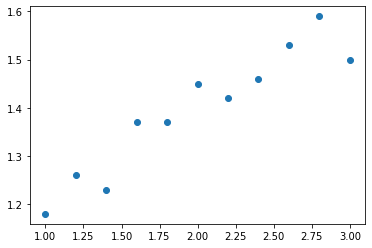

In [ ]:
import pandas as pd
data = pd.read_csv
data = np.array(data)

print(data)


plt.plot(x,y, 'o')
plt.show()

In [ ]:
x = data[:, 0]
y = data[:, 1]

print(x.shape)
print(y.shape)

n = 5
N = x.size

A = np.zeros((N, n+1))

for i in range(n+1):
  A[:, i] = 

SyntaxError: ignored

# Equazioni Normali

In [ ]:
ATA = # TODO 
ATy = # TODO 

lu, piv = LUdec.lu_factor(ATA)

print('LU = \n', lu)
print('piv = ', piv)

alpha_normali = LUdec.lu_solve((lu, piv), ATy)

# SVD

In [ ]:
U, s, Vh = # TODO 

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = 0

for i in range(n+1):
  ui = # TODO 
  vi = # TODO 

  alpha_svd = alpha_svd + # TODO 

# Visualizzazione risultati

In [ ]:
x_new = np.linspace(1, 12, 100)
y_normali = p(alpha_normali, x_new)
y_svd = p(alpha_svd, x_new)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y, 'o')
plt.plot(x_new, y_normali, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite Minimi Quadrati')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(x, y, 'o')
plt.plot(x_new, y_svd, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Approssimazione tramite SVD')
plt.grid()

plt.show()

## 3) Compressione di una immagine tramite SVD

---
Caricare e visualizzare un'immagine A in scala di grigio, di dimensione $m \times n$. Poi:
* Calcolare la matrice $A_p=\sum_{i=1}^p u_i * v_i^T * \sigma_i$, dove  $p\le rango(A)$
*   Visualizzare le immagini $A_p$ ottenute al variare di p, considerando i valori singolari in ordine prima crescente poi decrescente.
*   Calcolare l' errore relativo: $$\frac{\|A-A_p\|_2}{\|A\|_2}$$ e plottarlo al variare di p. 
*  Calcolare il fattore di compressione  $$c_p = \frac{1}{p}\min(m,n) -1$$  e plottarlo al variare di p.


In [ ]:
from skimage import data

help(data)

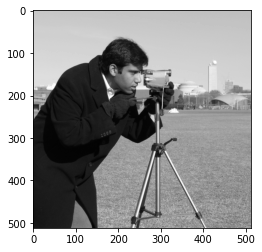

In [ ]:
A = data.camera()

plt.imshow(A, cmap='gray')
plt.show()

In [ ]:
U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape) 
print('Shape of V:', Vh.T.shape)

A_p = np.zeros(A.shape) 
p_max = 10

err_rel = np.zeros((p_max)) 
c = np.zeros((p_max))

for i in range(p_max): 
  ui = U[:,i] 
  vi = Vh[i,:]

  A_p = A_p + (np.outer(ui,vi)*s[i])

  err_rel[i] = np.linalg.norm(A - A_p)/np.linalg.norm(A) 
  c[i] = (1/p_max)*np.minimum(A.shape[0],A.shape[1]) - 1

print('\n') 
print('L''errore relativo della ricostruzione di A è', err_rel[-1])
print('Il fattore di compressione è c=', c[-1])


Shape of U: (512, 512)
Shape of s: (512,)
Shape of V: (512, 512)


Lerrore relativo della ricostruzione di A è 0.13502492827621673
Il fattore di compressione è c= 50.2


In [ ]:
plt.figure(figsize=(10, 5))

fig1 = plt.subplot(1, 2, 1)
fig1.plot(err_rel, 'o-')
plt.title('Errore relativo')

fig2 = plt.subplot(1, 2, 2)
fig2.plot(c, 'o-')
plt.title('Fattore di compressione')

plt.show()

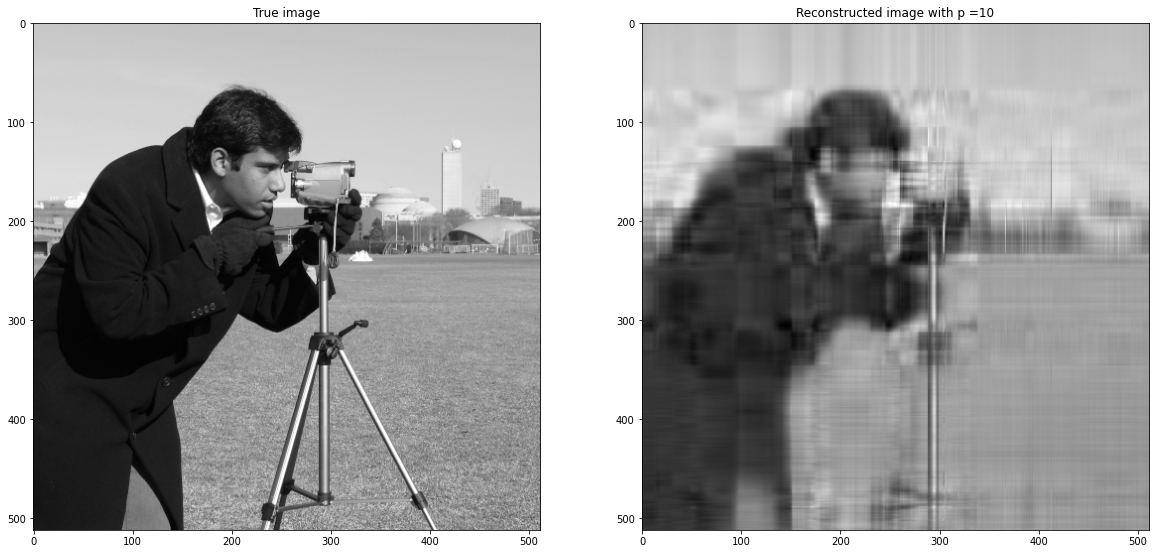

In [ ]:
plt.figure(figsize=(20, 10))

fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap='gray')
plt.title('True image')

fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap='gray')
plt.title('Reconstructed image with p =' + str(p_max))

plt.show()

# Caricamento immagine da file
Ripetere lo stesso esercizio caricando l'immagine l'immagine  https://upload.wikimedia.org/wikipedia/commons/d/d8/Stereo-1_channel_image_of_Phobos_ESA214117.jpg

(1000, 1000)


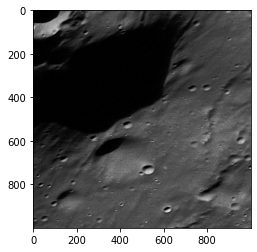

In [ ]:
A = plt.imread('Stereo-1_channel_image_of_Phobos_ESA214117.jpg')

A = A[3000:4000, 5000:6000]

print(A.shape)

plt.imshow(A, cmap='gray')
plt.show()

In [ ]:
U, s, Vh = np.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)


A_p = np.zeros(A.shape)
p_max = 50

err_rel = np.zeros((p_max))
c = np.zeros((p_max))

for i in range(p_max):
  ui = U[:,i]
  vi = Vh[i,:] 

  A_p = A_p + np.outer(ui,vi) * s[i]

  err_rel[i] = np.linalg.norm(A - A_p)/np.linalg.norm(A)
  c[i] = (1/p_max)*np.minimum(A.shape[0],A.shape[1]) - 1

print('\n')
print('L\'errore relativo della ricostruzione di A è', err_rel[-1])
print('Il fattore di compressione è c=', c[-1])

Shape of U: (1000, 1000)
Shape of s: (1000,)
Shape of V: (1000, 1000)


L'errore relativo della ricostruzione di A è 0.08422443607282366
Il fattore di compressione è c= 19.0


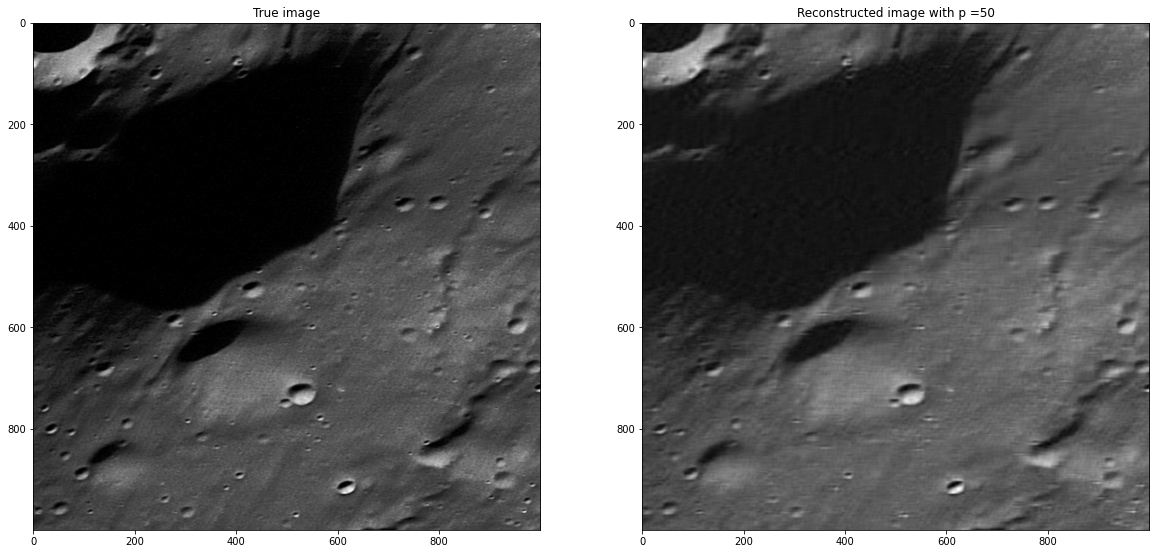

In [ ]:
plt.figure(figsize=(20, 10))

fig1 = plt.subplot(1, 2, 1)
fig1.imshow(A, cmap='gray')
plt.title('True image')

fig2 = plt.subplot(1, 2, 2)
fig2.imshow(A_p, cmap='gray')
plt.title('Reconstructed image with p =' + str(p_max))

plt.show()